Real Helmholtz Uniformity
=========================

Study the uniformity of a pure Helmholtz model for comparison with more realistic coils.

This uses the FEMME model RHelmS0 which puts point 1A/mm2 currents through 2cm tall by 0.8cm thick coils centered at x=50cm, y=$\pm$25cm in a 1m radius sphere with 'infinite' boundary. This differs from the PureHelmholtz model only in the size of the coils and resulting difference in actual field strength.

This uses data from files written by Python which in turn controlled FEMME to do the real work. It should work anywhere so long as a dummy version of femm.py is available to
silence import errors from FieldGrids.

Start by loading some tools, including a set of FieldTools written specially for this task.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import femm

In [2]:
import FieldGrids as fp

We build a VectorField and load data into from the model. At the moment we have to start by building a grid describing the data we are loading.

In [6]:
dg = fp.Grid(xlow=0.0, dx=0.1, xhigh=15.0, ylow=-15.0, dy=0.1, yhigh=15.0)
bs0 = fp.VectorField(dg)
bs0.LoadFemmFile('RHelmS0.txt')

Just to prove the point, let's plot the data.

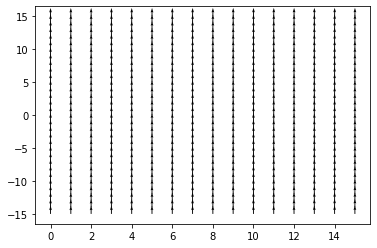

In [7]:
bs0.VPlot(10)

That looks sensible, if not very revealing.

Visualizing the Non-Uniformity
------------------------------

As before, we can get a look at the wiggles if we blow up the x component of the field and do a stream plot.

<AxesSubplot:>

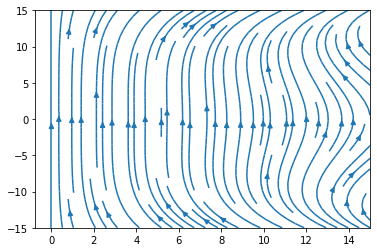

In [8]:
zbs0 = fp.VectorField(bs0)
zbs0.u *= 100
zbs0.StreamPlot()

Well, to my eye that it totally undistinguishable from the pure Helmholtz version. GOOD.

Let's probe into the non-uniformity using the same technique that we used on the pure fields.

The Non-Uniform Part of the Field
---------------------------------

A more instructive view is to look at the magnitude of the difference between this field magnitude and a uniform field matching the center value. I start by constructing this difference field and scale it to the central field. This gives us values which are fractional deviations from the central field. They are easier to interpret.

<Axes3DSubplot:>

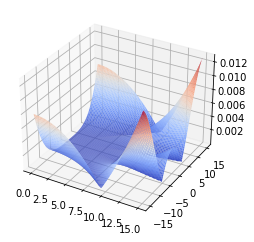

In [10]:
bmag = bs0.Mag()
B0 = bmag.u[150,0]
bs0diff = fp.ScalarField(bmag)
bs0diff.u = np.abs(bs0diff.u - B0 + 1e-9)
bs0diff.u /= B0
bs0diff.Splot(2)

So that agrees with the previous plot and we can now look it at in a contour plot with logarithmic contour levels, which should strongly resemble the previous contour plot.

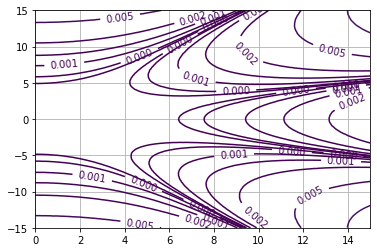

In [11]:
cax = bs0diff.Cplot([1e-4,2e-4,5e-4,1e-3,2e-3,5e-3,1e-2,2e-2,5e-2,1e-1,2e-1])
cax.grid(axis='both')

Once again, this is indistinguishable from the pure Helmholtz field. I am going to call this a win! For the sake of future comparisons let's redo this with the 5-10cm radii circles added.

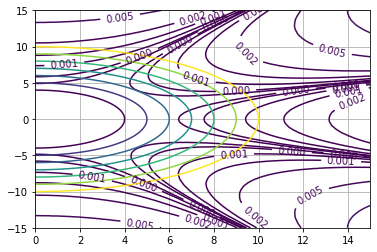

In [13]:
rf = fp.ScalarField(bmag)
rf.u = np.sqrt(rf.x * rf.x + rf.y * rf.y)
cax = bs0diff.Cplot([1e-4,2e-4,5e-4,1e-3,2e-3,5e-3,1e-2,2e-2,5e-2,1e-1,2e-1])
cax.grid(axis='both')
cax.contour(rf.x,rf.y,rf.u,levels=[4.0, 5.0,6,7,8,9,10])